# Car price prediction: Group 6


### <center> Importing essential libraries </center>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

### <center>Loading dataset from csv file as a dataframe and inspection top 5 records </center>

In [2]:
#reading the dataset
original_df = pd.read_csv('C:\\Users\\ADMIN\\Downloads\\data.csv')
original_df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


### <center>Inspection shape(rows x cols) of dataframe</center>

In [3]:
#finding out the dimensions of our dataframe
original_df.shape

(251079, 15)

In [4]:
#drill down of dataframe
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

### Our target variable(price) is in string format so converting it into float

In [5]:
#Conversion of datatype
original_df['price_in_euro'] = pd.to_numeric(original_df['price_in_euro'], errors='coerce')

In [6]:
original_df.describe()

,Unnamed: 0,price_in_euro,mileage_in_km
count,251079.000000,2.508800e+05,2.509270e+05
mean,125539.000000,2.613753e+04,8.534002e+04
std,72480.408456,3.698795e+04,7.871706e+04
min,0.000000,1.200000e+02,0.000000e+00
25%,62769.500000,1.199000e+04,2.490400e+04
50%,125539.000000,1.989000e+04,6.750000e+04
75%,188308.500000,2.995000e+04,1.265000e+05
max,251078.000000,5.890500e+06,3.800000e+06


### Drop those record/rows with null values in price column

In [7]:
original_df.dropna(subset=['price_in_euro'], inplace=True)

In [8]:
original_df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300.0,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900.0,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900.0,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900.0,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950.0,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


### Dropping unnnecessary columns

In [9]:
df = original_df.drop(columns=['Unnamed: 0', 'registration_date', 'fuel_consumption_g_km'])

In [10]:
df

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,1995,1300.0,148,201,Manual,Petrol,"10,9 l/100 km",160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,1995,24900.0,191,260,Manual,Petrol,NaN,190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,1995,5900.0,110,150,Unknown,Petrol,NaN,129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,1995,4900.0,110,150,Manual,Petrol,"9,5 l/100 km",189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,1996,17950.0,132,179,Manual,Petrol,"7,2 l/100 km",96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...
251074,volvo,Volvo XC40,white,2023,57990.0,192,261,Automatic,Hybrid,NaN,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,volvo,Volvo XC90,white,2023,89690.0,173,235,Automatic,Diesel,"7,6 l/100 km",4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,volvo,Volvo V60,white,2023,61521.0,145,197,Automatic,Diesel,"4,7 l/100 km",1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,volvo,Volvo XC40,white,2023,57890.0,132,179,Automatic,Hybrid,NaN,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250880 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     250880 non-null  object 
 1   model                     250880 non-null  object 
 2   color                     250714 non-null  object 
 3   year                      250880 non-null  object 
 4   price_in_euro             250880 non-null  float64
 5   power_kw                  250752 non-null  object 
 6   power_ps                  250752 non-null  object 
 7   transmission_type         250880 non-null  object 
 8   fuel_type                 250880 non-null  object 
 9   fuel_consumption_l_100km  224007 non-null  object 
 10  mileage_in_km             250818 non-null  float64
 11  offer_description         250880 non-null  object 
dtypes: float64(2), object(10)
memory usage: 24.9+ MB


### Converting features into numeric. (values are represented as str eventhough they are numeric)

In [12]:
cols =  ['year','power_kw', 'power_ps']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [13]:
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',', '.').str.extract(r'(\d+\.\d+)').astype(float)

In [14]:
df = df.dropna()
df.drop('offer_description', axis=1, inplace=True)
df.rename({'mileage_in_km': 'odometer'}, axis=1, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11084\3593795507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('offer_description', axis=1, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11084\3593795507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'mileage_in_km': 'odometer'}, axis=1, inplace=True)


In [15]:
df = df[df['price_in_euro'] > 3000]
df = df[df['odometer'] > 1000]
df = df[np.abs(stats.zscore(df['price_in_euro'])) < 1]
df = df[np.abs(stats.zscore(df['fuel_consumption_l_100km'])) < 2]
df = df[np.abs(stats.zscore(df['odometer'])) < 2]
df = df[~df['fuel_type'].isin(['Hydrogen', 'Ethanol'])]

In [16]:
df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150124 entries, 4 to 251073
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     150124 non-null  object 
 1   model                     150124 non-null  object 
 2   color                     150124 non-null  object 
 3   year                      150124 non-null  float64
 4   price_in_euro             150124 non-null  float64
 5   power_kw                  150124 non-null  float64
 6   power_ps                  150124 non-null  float64
 7   transmission_type         150124 non-null  object 
 8   fuel_type                 150124 non-null  object 
 9   fuel_consumption_l_100km  150124 non-null  float64
 10  odometer                  150124 non-null  float64
dtypes: float64(6), object(5)
memory usage: 13.7+ MB


## <center>Exploratory Data Analysis (EDA)</center>

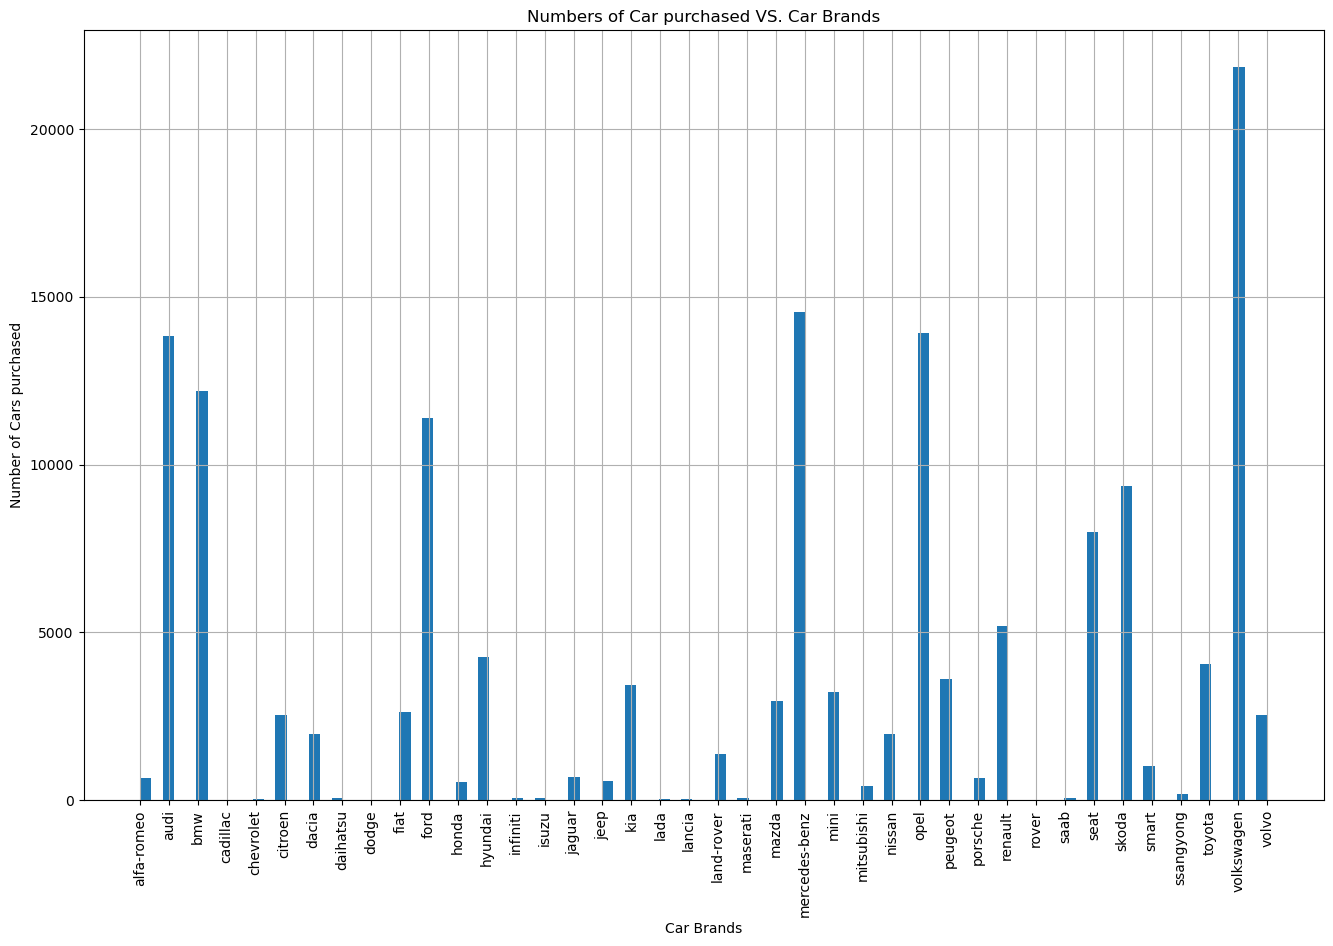

In [18]:
df['brand'].hist(bins=100,figsize=(16,10))
plt.xticks(rotation=90)
plt.ylabel("Number of Cars purchased")
plt.xlabel("Car Brands")
plt.title("Numbers of Car purchased VS. Car Brands")
plt.show()

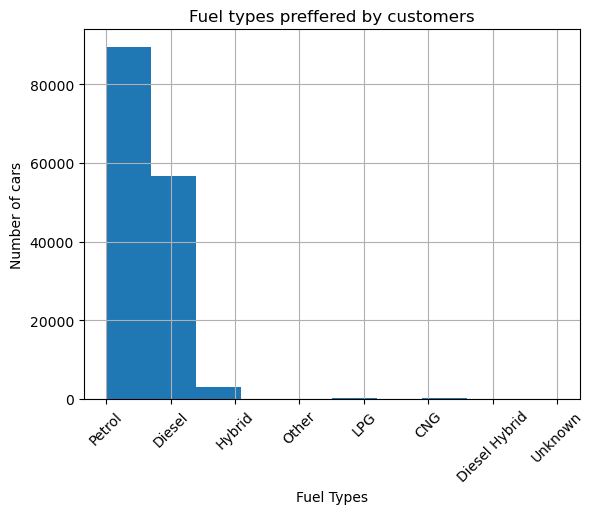

In [19]:
#Displaying the fuel type which consumers prefer
df["fuel_type"].hist(bins=10)
plt.title('Fuel types preffered by customers')
plt.xlabel('Fuel Types')
plt.ylabel('Number of cars')
plt.xticks(rotation=45)
plt.show()

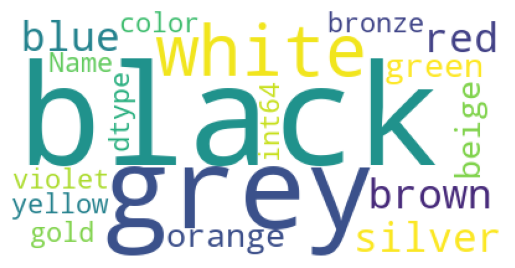

<Figure size 4000x3000 with 0 Axes>

In [20]:
#Displaying the color which is highly purchased
text = df['color'].value_counts() 

wordcloud = WordCloud(background_color="white").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(40,30))
plt.show()

### Checking for correlation between different variables


In [21]:
corr_mat=df.corr()
round(corr_mat,2)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11084\1943208739.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df.corr()


,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,odometer
year,1.00,0.62,0.08,0.08,-0.32,-0.68
price_in_euro,0.62,1.00,0.60,0.60,0.15,-0.46
power_kw,0.08,0.60,1.00,1.00,0.45,0.10
power_ps,0.08,0.60,1.00,1.00,0.45,0.10
fuel_consumption_l_100km,-0.32,0.15,0.45,0.45,1.00,0.13
odometer,-0.68,-0.46,0.10,0.10,0.13,1.00


<Axes: >

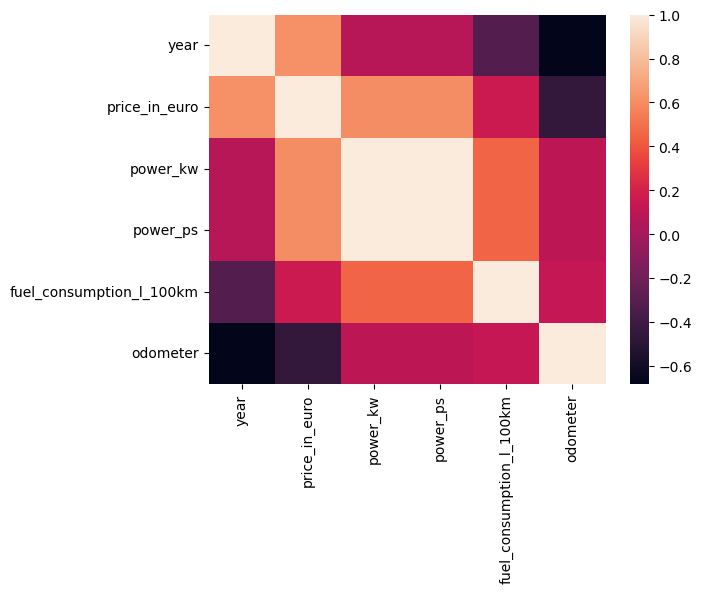

In [22]:
sns.heatmap(corr_mat)

### Applying OHE for Nominal Data

In [23]:
f_df = pd.get_dummies(df, columns=['color', 'fuel_type', 'transmission_type'], drop_first=True)

In [24]:
f_df

,brand,model,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,odometer,color_black,color_blue,...,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Hybrid,fuel_type_LPG,fuel_type_Other,fuel_type_Petrol,fuel_type_Unknown,transmission_type_Manual,transmission_type_Semi-automatic,transmission_type_Unknown
4,alfa-romeo,Alfa Romeo 164,1996.0,17950.0,132.0,179.0,7.2,96127.0,0,0,...,0,0,0,0,0,1,0,1,0,0
6,alfa-romeo,Alfa Romeo 145,1996.0,3500.0,110.0,150.0,8.8,230000.0,0,0,...,0,0,0,0,0,1,0,1,0,0
9,alfa-romeo,Alfa Romeo Spider,1996.0,6976.0,110.0,150.0,9.2,99000.0,1,0,...,0,0,0,0,0,1,0,1,0,0
14,alfa-romeo,Alfa Romeo 155,1997.0,7950.0,88.0,120.0,8.4,101726.0,0,0,...,0,0,0,0,0,1,0,1,0,0
16,alfa-romeo,Alfa Romeo GTV,1997.0,6900.0,110.0,150.0,9.2,110313.0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251061,volvo,Volvo XC40,2023.0,38200.0,120.0,163.0,6.6,2182.0,0,0,...,0,0,0,0,0,1,0,0,0,0
251062,volvo,Volvo V60,2023.0,50000.0,145.0,197.0,6.3,6047.0,0,0,...,0,0,0,0,0,1,0,0,0,0
251065,volvo,Volvo XC40,2023.0,37900.0,120.0,163.0,6.6,2145.0,0,0,...,0,0,0,0,0,1,0,0,0,0
251068,volvo,Volvo XC40,2023.0,37995.0,120.0,163.0,6.7,2100.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
final_df= f_df[['power_kw','price_in_euro', 'power_ps', 'year', "odometer","fuel_consumption_l_100km","color_black","color_blue","fuel_type_Hybrid","fuel_type_Petrol","transmission_type_Semi-automatic","transmission_type_Manual"]]

In [26]:
#As we can see that our target variable "price" is in correlation with features power_kw, power_ps and fuel_consumption
#We will now fit a multi linear model against the target using these features, also with the OHE features we have dropped the least occuring columns in OHE variables.



In [27]:
reg= linear_model.LinearRegression()

In [28]:
X=final_df[['power_kw', 'power_ps', 'year', "odometer","fuel_consumption_l_100km","color_black","color_blue","fuel_type_Hybrid","fuel_type_Petrol","transmission_type_Semi-automatic","transmission_type_Manual"]]
y=final_df["price_in_euro"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (105086, 11)
X_test.shape: (45038, 11)
y_train.shape: (105086,)
y_test.shape: (45038,)


In [29]:
reg.fit(X_train,y_train)

LinearRegression()

In [30]:
reg.score(X_test,y_test)

0.7686382596021206